# Projeto 5 - Terá pena de morte ou não?

<img src="https://thumbs.jusbr.com/imgs.jusbr.com/publications/images/f9d3af089c0f765a2f6f4d537f5b6a58" width="500" height="100"/>

In [23]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from plotnine import *

In [24]:
df = pd.read_sas('penalty.sas7bdat')
df

,death,blackd,whitvic,serious,culp,serious2
0,0.0,1.0,0.0,7.1,2.0,3.400000
1,1.0,0.0,1.0,11.5,5.0,4.666667
2,0.0,0.0,0.0,6.0,2.0,3.000000
3,0.0,0.0,1.0,8.4,4.0,3.200000
4,1.0,1.0,0.0,12.2,5.0,4.200000
...,...,...,...,...,...,...
142,0.0,0.0,1.0,5.3,1.0,2.200000
143,1.0,0.0,1.0,5.7,5.0,3.000000
144,0.0,0.0,1.0,10.6,2.0,4.000000
145,1.0,1.0,1.0,3.9,3.0,2.400000


In [25]:
df['death'].value_counts()

0.0    97
1.0    50
Name: death, dtype: int64

# Ver se tem valores fora do padrão

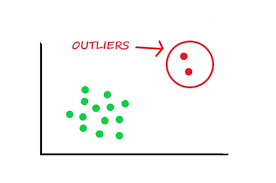

# Separar em diversos treinos e testes - Validação Cruzada
<img src="https://miro.medium.com/max/800/1*kkMtezwv8qj1t9uG4nw_8g.png" width="400" height="100"/>

In [26]:
metrica_LR = []
metrica_LDA = []
metrica_DT = []
metrica_KN = []
metrica_SVM = []
metrica_RF = []

x = train.drop(columns=['death'],axis=1)
y = train['death']

for i in range(100):
    # Separar a variável target das features (tanto do treino como do teste)
    train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.2)
    # retirar colunas que não usaremos
    # valor vazio
    # tratar variável numérica
    # categóricas em numéricas

    LR = LogisticRegression().fit(train_x,train_y)
    LDA = LinearDiscriminantAnalysis().fit(train_x,train_y)
    DT = DecisionTreeClassifier().fit(train_x,train_y)
    KN = KNeighborsClassifier().fit(train_x,train_y)
    SVM = SVC().fit(train_x,train_y)
    RF = RandomForestClassifier().fit(train_x,train_y)
    
    metrica_LR.append(LR.score(test_x,test_y))
    metrica_LDA.append(LDA.score(test_x,test_y))
    metrica_DT.append(DT.score(test_x,test_y))
    metrica_KN.append(KN.score(test_x,test_y))
    metrica_SVM.append(SVM.score(test_x,test_y))
    metrica_RF.append(RF.score(test_x,test_y))

In [27]:
metricas = list(zip(metrica_LR, metrica_LDA,metrica_DT,metrica_KN,metrica_SVM,metrica_RF))
  
dados = pd.DataFrame(metricas, columns = ['LR','LDA','DT','KN','SVM','RF'])
   
dados

,LR,LDA,DT,KN,SVM,RF
0,0.708333,0.750000,0.750000,0.666667,0.750000,0.708333
1,0.791667,0.791667,0.833333,0.833333,0.833333,0.833333
2,0.791667,0.791667,0.833333,0.708333,0.750000,0.791667
3,0.750000,0.833333,0.541667,0.791667,0.833333,0.791667
4,0.875000,0.875000,0.833333,0.875000,0.875000,0.875000
...,...,...,...,...,...,...
95,0.666667,0.666667,0.625000,0.666667,0.666667,0.666667
96,0.875000,0.875000,0.791667,0.791667,0.791667,0.708333
97,0.916667,0.916667,0.708333,0.916667,0.875000,0.833333
98,0.708333,0.708333,0.666667,0.750000,0.708333,0.708333


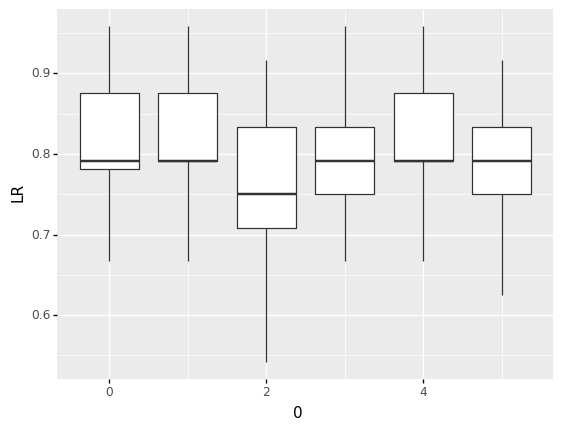

<ggplot: (343325940)>

In [28]:
(
    ggplot(dados) +
    geom_boxplot(aes(x = 0 , y='LR')) +
    geom_boxplot(aes(x = 1 , y='LDA')) +
    geom_boxplot(aes(x = 2 , y='DT')) +
    geom_boxplot(aes(x = 3 , y='KN')) +
    geom_boxplot(aes(x = 4 , y='SVM')) +
    geom_boxplot(aes(x = 5 , y='RF'))
)